In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#loading the data set
df = pd.read_csv('./Life Expectancy Data.csv')
df.head(10)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


In [3]:
df.shape



(2938, 22)

In [4]:
#data cleaning
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [5]:
#Replacing data with Medians
for x in list(df.columns): 
    if float(df['{}'.format(x)].isnull().sum()) != 0:
        df['{}'.format(x)].fillna((df['{}'.format(x)].median()), inplace = True)

In [6]:
#No null values
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [7]:
df1 = df.drop(['Year','Country', 'Status'], axis = 1)

C:\Users\meckw\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\meckw\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\meckw\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

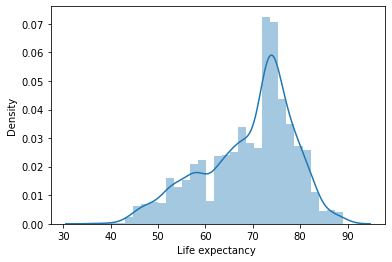

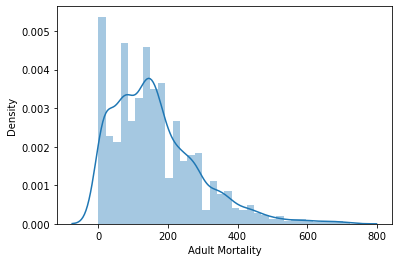

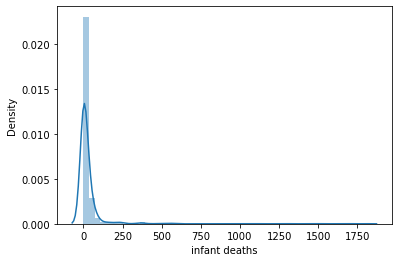

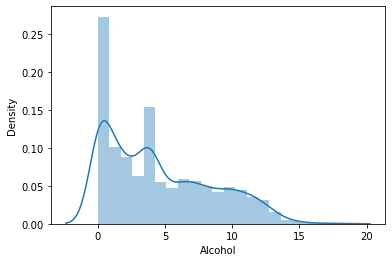

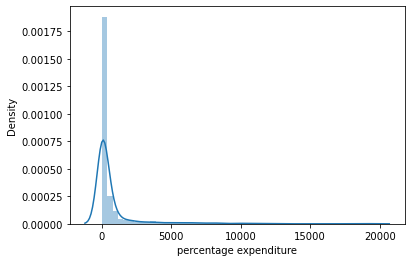

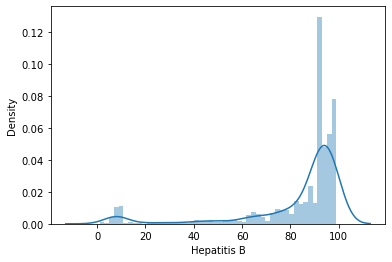

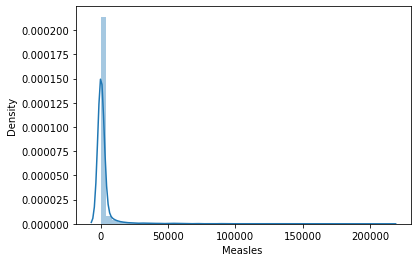

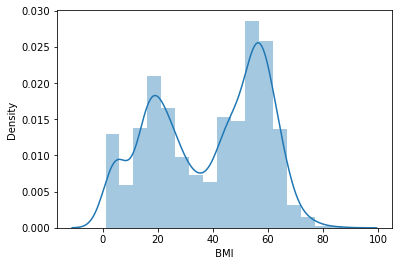

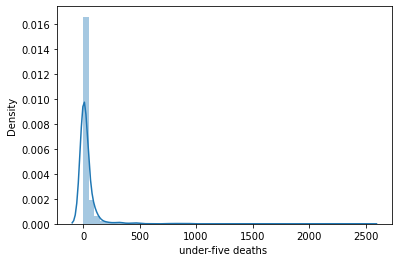

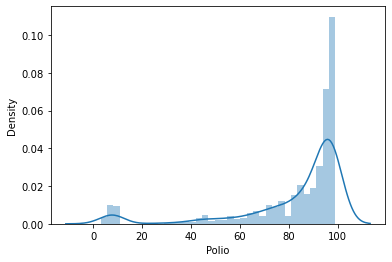

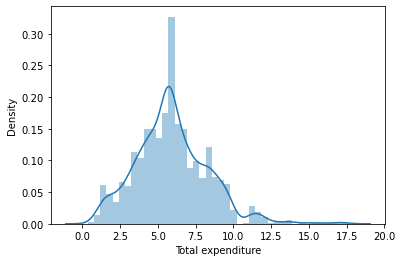

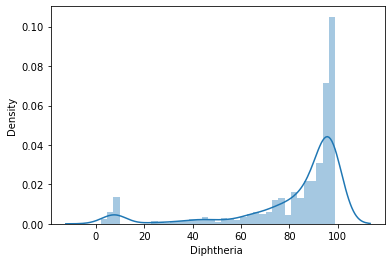

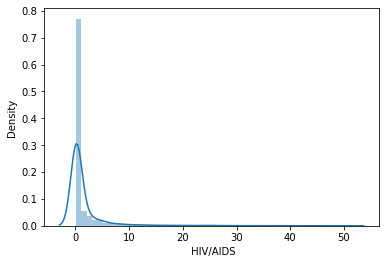

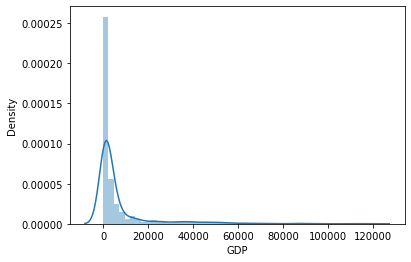

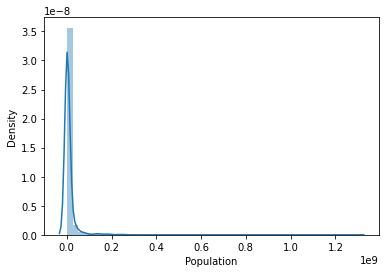

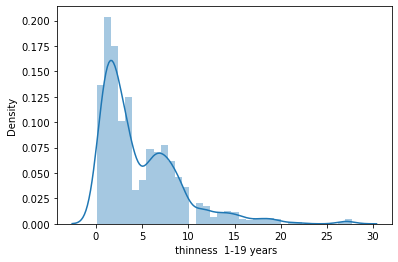

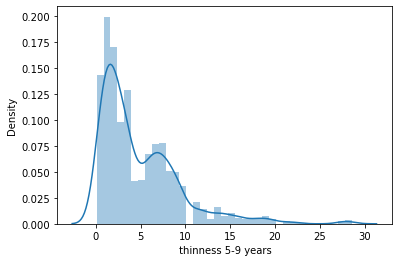

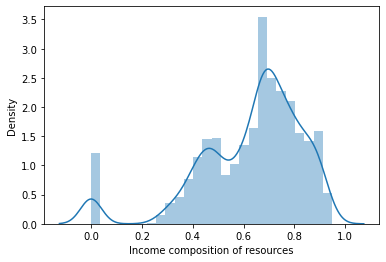

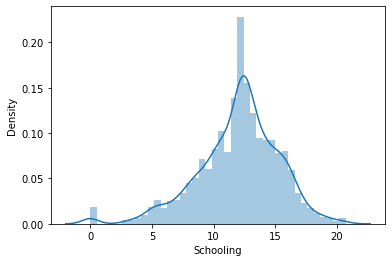

In [8]:
#distribution
for i in df1.columns:
    plt.figure()
    sns.distplot(df1[i])

In [9]:
#for outliers
#skewed columns and Nearly Normal Distribution
skew = ['infant deaths', 'percentage expenditure', 'Hepatitis B', 'Measles ', 'under-five deaths ', 'Polio', 'GDP', 'Population',' HIV/AIDS', 'Diphtheria ', ' thinness  1-19 years', ' thinness 5-9 years']
norm = ['Life expectancy ', 'Adult Mortality', 'Alcohol', ' BMI ', 'Total expenditure', 'Income composition of resources', 'Schooling' ]


In [10]:
#outliers analysis
df[skew].describe(percentiles=(1,0.99,0.9,0.75,0.5,0.3,0.1,0.01))
#Adultmortality, infant deaths, percentage expenditure, Measles, 

,infant deaths,percentage expenditure,Hepatitis B,Measles,under-five deaths,Polio,GDP,Population,HIV/AIDS,Diphtheria,thinness 1-19 years,thinness 5-9 years
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,30.303948,738.251295,83.022124,2419.592240,42.035739,82.617767,6611.523863,1.023085e+07,1.742103,82.393125,4.821886,4.852144
std,117.926501,1987.914858,22.996984,11467.272489,160.445548,23.367166,13296.603449,5.402242e+07,5.077785,23.655562,4.397621,4.485854
min,0.000000,0.000000,1.000000,0.000000,0.000000,3.000000,1.681350,3.400000e+01,0.100000,2.000000,0.100000,0.100000
1%,0.000000,0.000000,6.000000,0.000000,0.000000,6.000000,24.455693,8.138700e+02,0.100000,6.000000,0.200000,0.100000
10%,0.000000,0.000000,55.000000,0.000000,0.000000,52.000000,196.492625,4.725510e+04,0.100000,49.000000,0.800000,0.800000
30%,1.000000,10.857350,86.000000,0.000000,1.000000,83.000000,781.689304,6.737551e+05,0.100000,83.000000,1.900000,1.900000
50%,3.000000,64.912906,92.000000,17.000000,4.000000,93.000000,1766.947595,1.386542e+06,0.100000,93.000000,3.300000,3.300000
75%,22.000000,441.534144,96.000000,360.250000,28.000000,97.000000,4779.405190,4.584371e+06,0.800000,97.000000,7.100000,7.200000
90%,58.000000,1852.947925,98.000000,3580.100000,87.000000,99.000000,18624.381093,1.801808e+07,4.400000,99.000000,9.700000,9.700000


In [11]:
#treating outliers
for x in skew:
    col_df = pd.DataFrame(df[x])
    col_median = col_df.median()
    Q3 = col_df.quantile(q=0.75)
    Q1 = col_df.quantile(q=0.25)
    IQR = Q3-Q1
    #deriving boundaries
    IQR_LL = float(Q1-1.5*IQR)
    IQR_UL = float(Q3+1.5*IQR)
    #Finding and treating outliers
    df.loc[df[x]>IQR_UL,x] = float(col_df.quantile(q=0.80))
    df.loc[df[x]<IQR_LL,x] = float(col_df.quantile(q=0.2))

In [12]:
df[skew].describe(percentiles=(1,0.99,0.9,0.75,0.5,0.3,0.1,0.01))

,infant deaths,percentage expenditure,Hepatitis B,Measles,under-five deaths,Polio,GDP,Population,HIV/AIDS,Diphtheria,thinness 1-19 years,thinness 5-9 years
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,10.847515,221.395810,88.696664,204.224370,14.023281,87.588155,2768.640278,2.611426e+06,0.471647,87.786930,4.430497,4.443125
std,14.113235,274.827584,9.318566,299.178999,18.020012,11.718926,2553.483885,2.802525e+06,0.574035,11.228348,3.444103,3.473281
min,0.000000,0.000000,61.000000,0.000000,0.000000,51.000000,1.681350,3.400000e+01,0.100000,51.000000,0.100000,0.100000
1%,0.000000,0.000000,63.000000,0.000000,0.000000,54.000000,24.455693,8.138700e+02,0.100000,55.000000,0.200000,0.100000
10%,0.000000,0.000000,76.400000,0.000000,0.000000,73.000000,196.492625,4.725510e+04,0.100000,74.000000,0.800000,0.800000
30%,1.000000,10.857350,86.000000,0.000000,1.000000,83.000000,781.689304,6.737551e+05,0.100000,83.000000,1.900000,1.900000
50%,3.000000,64.912906,92.000000,17.000000,4.000000,93.000000,1766.947595,1.386542e+06,0.100000,93.000000,3.300000,3.300000
75%,22.000000,441.534144,96.000000,360.250000,28.000000,97.000000,4779.405190,4.584371e+06,0.800000,97.000000,7.100000,7.200000
90%,29.000000,623.630843,98.000000,740.600000,40.600000,99.000000,6625.361168,7.180667e+06,1.500000,99.000000,9.000000,9.000000


In [13]:
#removing leftover outliers
for x in ['Polio', ' HIV/AIDS', 'Diphtheria ']:
    col_df = pd.DataFrame(df[x])
    col_median = col_df.median()
    Q3 = col_df.quantile(q=0.75)
    Q1 = col_df.quantile(q=0.25)
    IQR = Q3-Q1
    #deriving boundaries
    IQR_LL = float(Q1-1.5*IQR)
    IQR_UL = float(Q3+1.5*IQR)
    #Finding and treating outliers
    df.loc[df[x]>IQR_UL,x] = float(col_df.quantile(q=0.80))
    df.loc[df[x]<IQR_LL,x] = float(col_df.quantile(q=0.2))

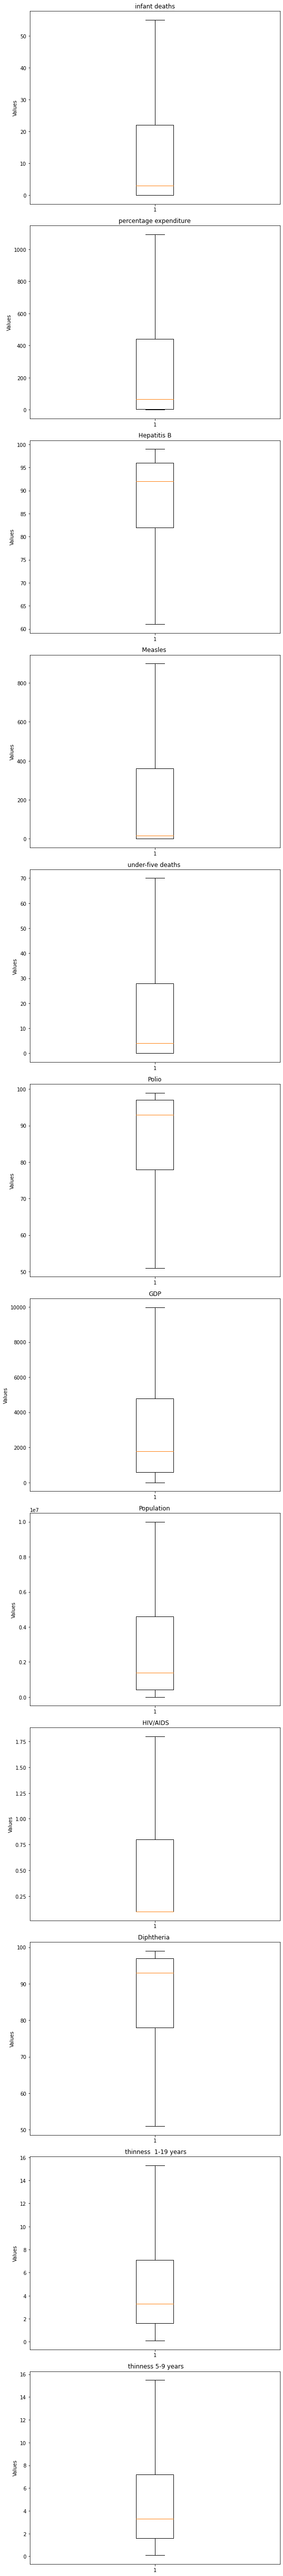

In [14]:
fig, axes = plt.subplots(nrows=len(df[skew].columns), figsize=(8, 6 * len(df[skew].columns)))

for i, column in enumerate(df[skew].columns):
    axes[i].boxplot(df[column])
    axes[i].set_title(column)
    axes[i].set_ylabel('Values')

plt.tight_layout()
plt.show()


In [15]:
#check the Outliers of norm
df[norm].describe(percentiles=(1,0.99,0.9,0.75,0.5,0.3,0.1,0.01))


,Life expectancy,Adult Mortality,Alcohol,BMI,Total expenditure,Income composition of resources,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000
mean,69.234717,164.725664,4.546875,38.381178,5.924098,0.630362,12.009837
std,9.509115,124.086215,3.921946,19.935375,2.400770,0.205140,3.265139
min,36.300000,1.000000,0.010000,1.000000,0.370000,0.000000,0.000000
1%,45.600000,4.370000,0.010000,2.300000,1.257400,0.000000,2.900000
10%,54.800000,19.000000,0.020000,12.170000,2.947000,0.394000,7.800000
30%,65.300000,84.000000,1.531000,22.700000,4.690000,0.560100,10.700000
50%,72.100000,144.000000,3.755000,43.500000,5.755000,0.677000,12.300000
75%,75.600000,227.000000,7.390000,56.100000,7.330000,0.772000,14.100000
90%,79.700000,336.000000,10.613000,61.800000,8.910000,0.860000,15.900000


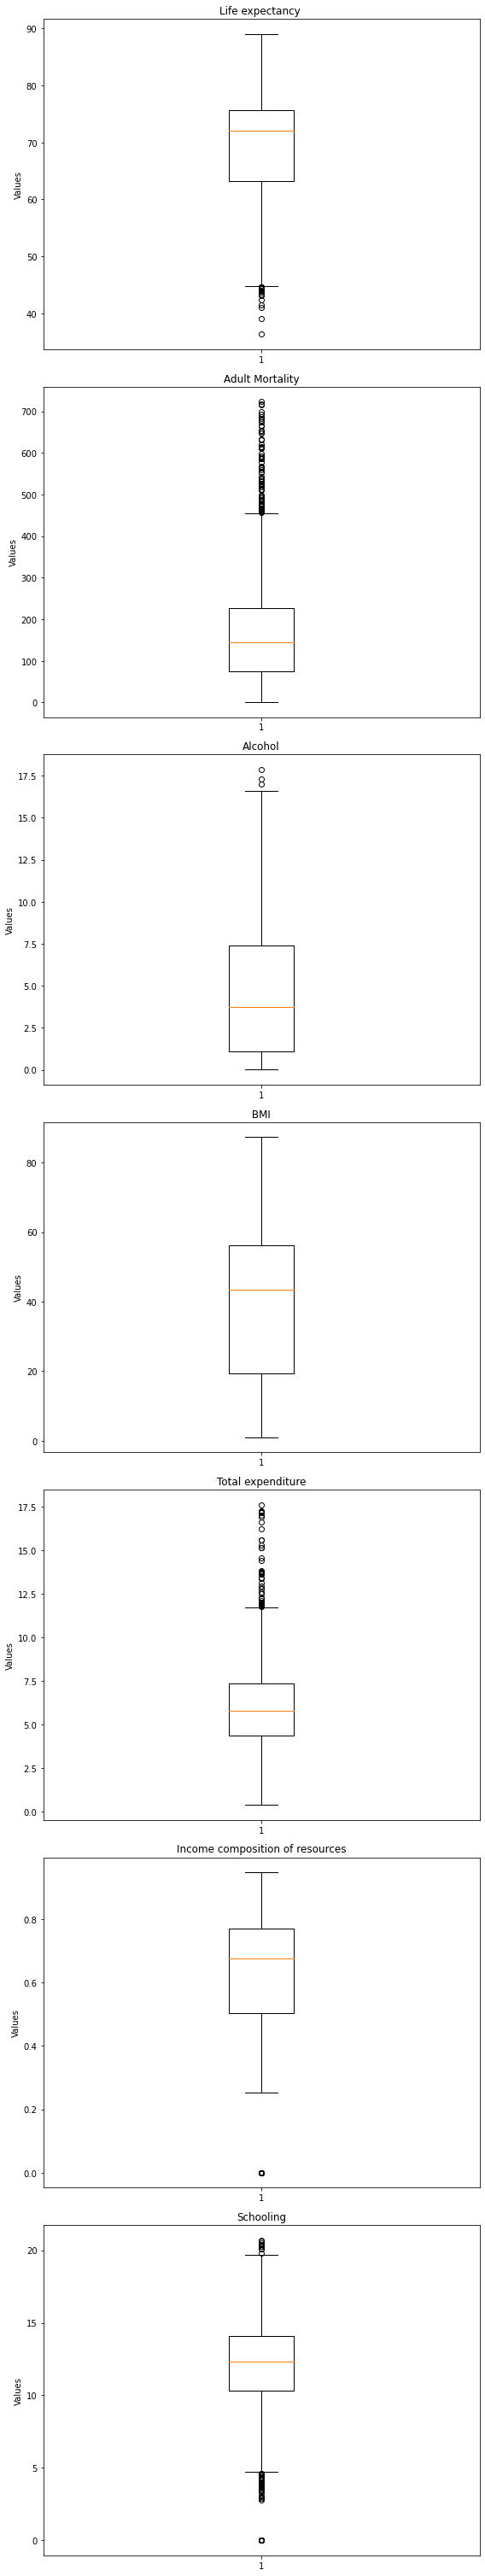

In [16]:
#outliers of Normal distributed columns
fig, axes = plt.subplots(nrows=len(df[norm].columns), figsize=(8, 6 * len(df[norm].columns)))

for i, column in enumerate(df[norm].columns):
    axes[i].boxplot(df[column])
    axes[i].set_title(column)
    axes[i].set_ylabel('Values')

plt.tight_layout()
plt.show()

In [17]:
for x in norm:
    col_df = pd.DataFrame(df[x])
    col_median = col_df.median()
    Q3 = col_df.quantile(q=0.75)
    Q1 = col_df.quantile(q=0.25)
    IQR = Q3-Q1
    #deriving boundaries
    IQR_LL = float(Q1-1.5*IQR)
    IQR_UL = float(Q3+1.5*IQR)
    #Finding and treating outliers
    df.loc[df[x]>IQR_UL,x] = float(col_df.quantile(q=0.95))
    df.loc[df[x]<IQR_LL,x] = float(col_df.quantile(q=0.05))

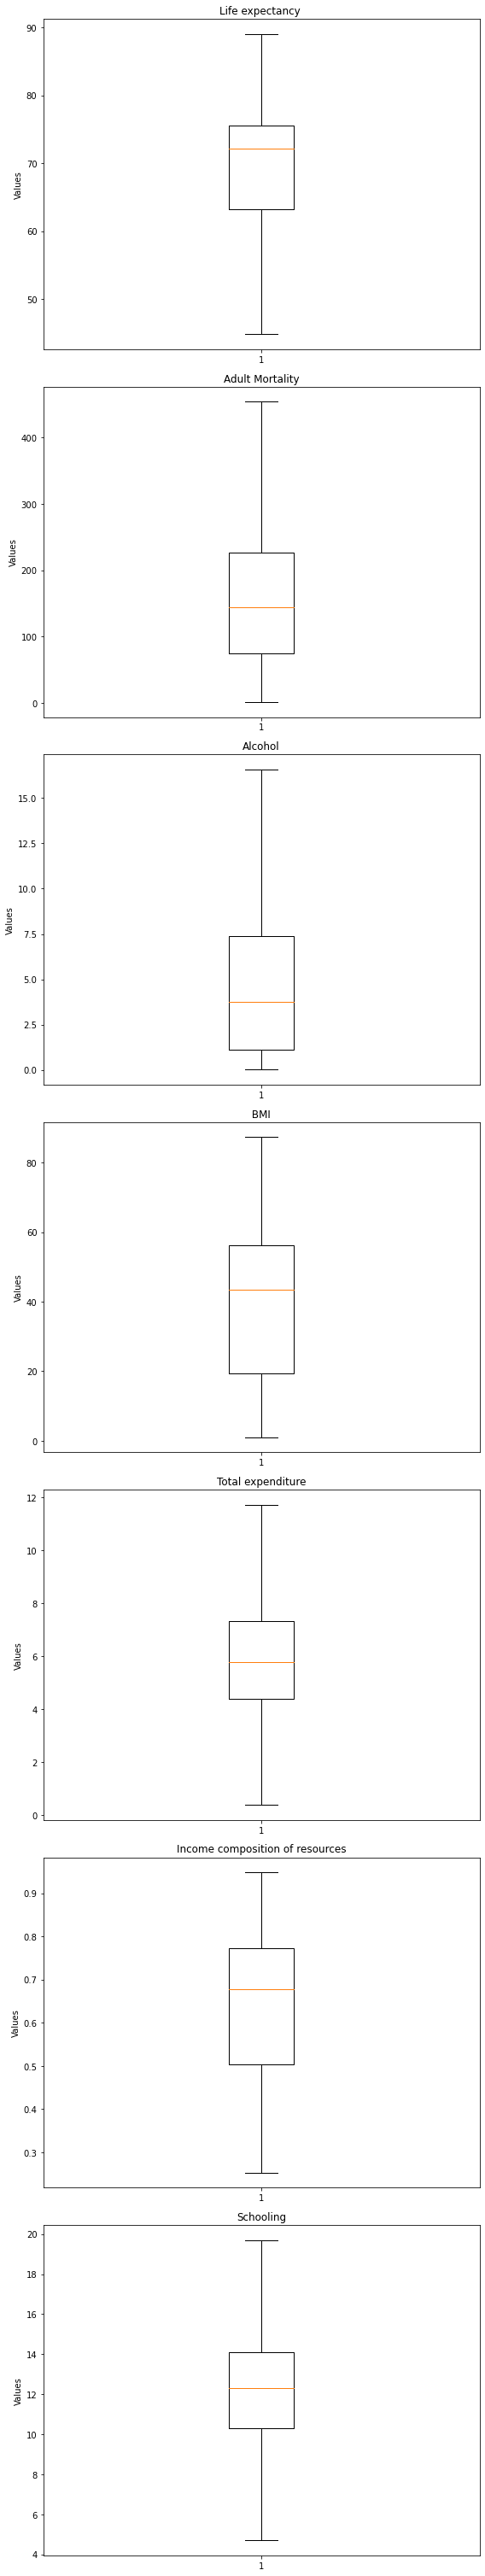

In [18]:
fig, axes = plt.subplots(nrows=len(df[norm].columns), figsize=(8, 6 * len(df[norm].columns)))

for i, column in enumerate(df[norm].columns):
    axes[i].boxplot(df[column])
    axes[i].set_title(column)
    axes[i].set_ylabel('Values')

plt.tight_layout()
plt.show()


In [19]:
for x in ['Life expectancy ', 'Income composition of resources', 'Schooling']:
    col_df = pd.DataFrame(df[x])
    col_median = col_df.median()
    Q3 = col_df.quantile(q=0.75)
    Q1 = col_df.quantile(q=0.25)
    IQR = Q3-Q1
    #deriving boundaries
    IQR_LL = float(Q1-1.5*IQR)
    IQR_UL = float(Q3+1.5*IQR)
    #Finding and treating outliers
    df.loc[df[x]>IQR_UL,x] = float(col_df.quantile(q=0.75))
    df.loc[df[x]<IQR_LL,x] = float(col_df.quantile(q=0.25))

C:\Users\meckw\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\meckw\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\meckw\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

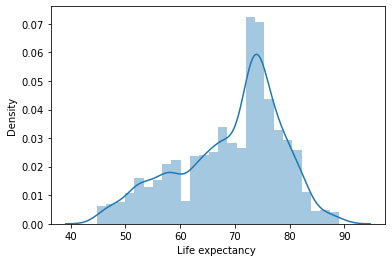

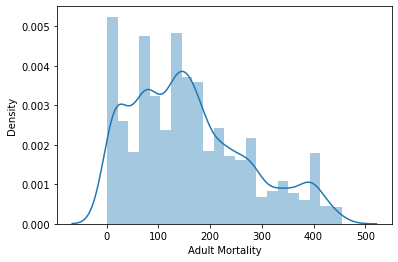

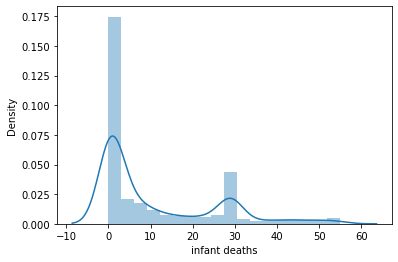

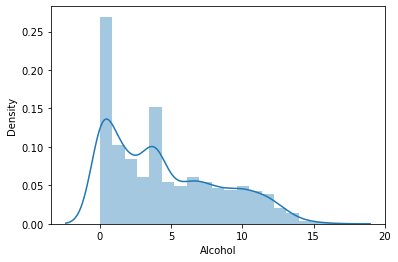

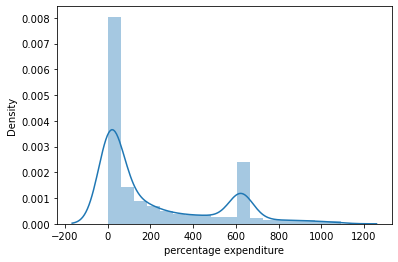

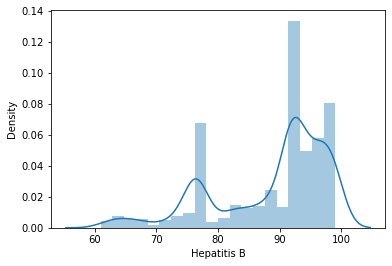

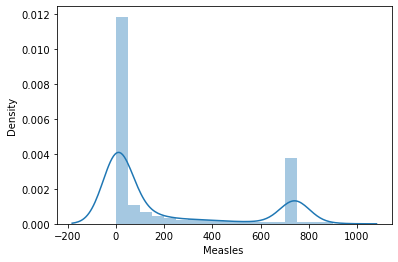

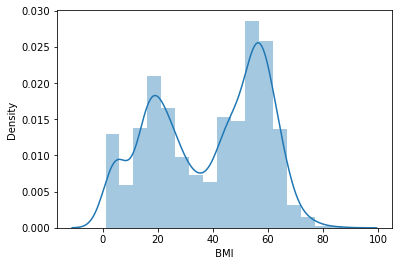

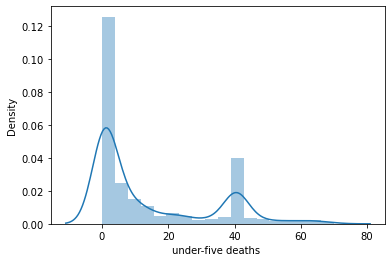

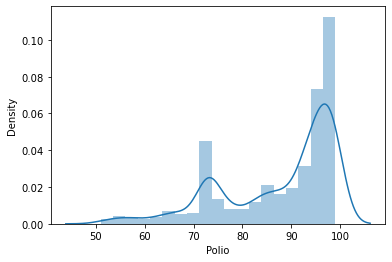

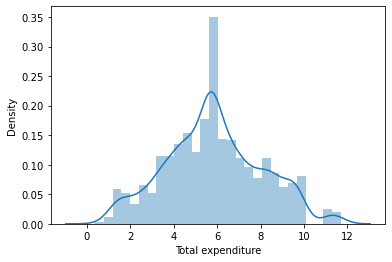

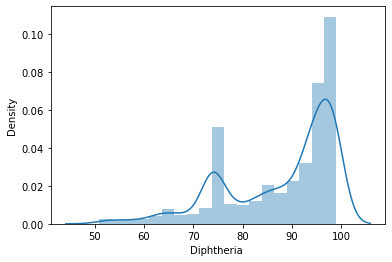

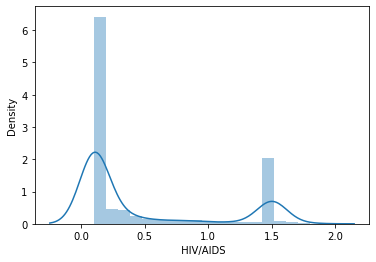

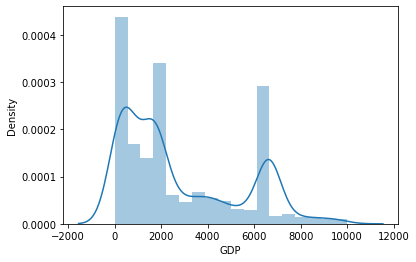

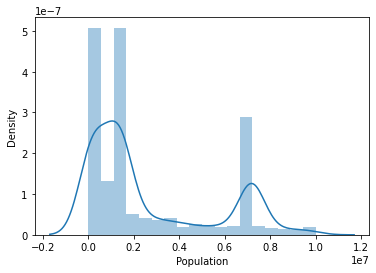

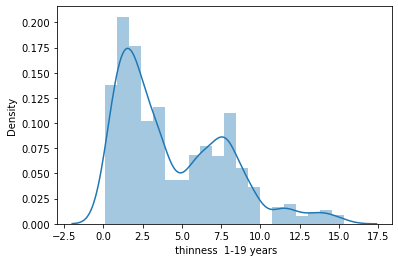

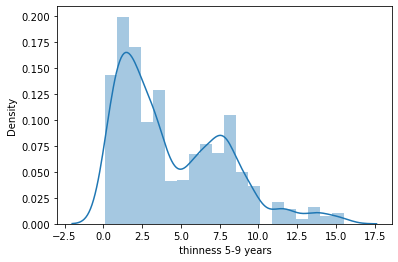

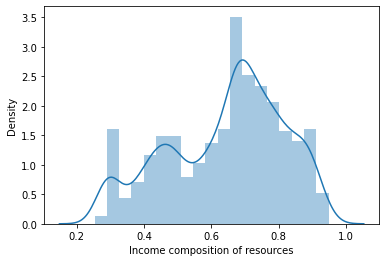

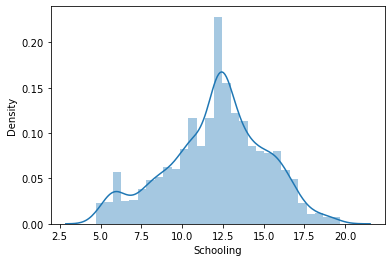

In [20]:
for i in df.drop(['Country','Year','Status'], axis=1).columns:
    plt.figure()
    sns.distplot(df[i])

<AxesSubplot:>

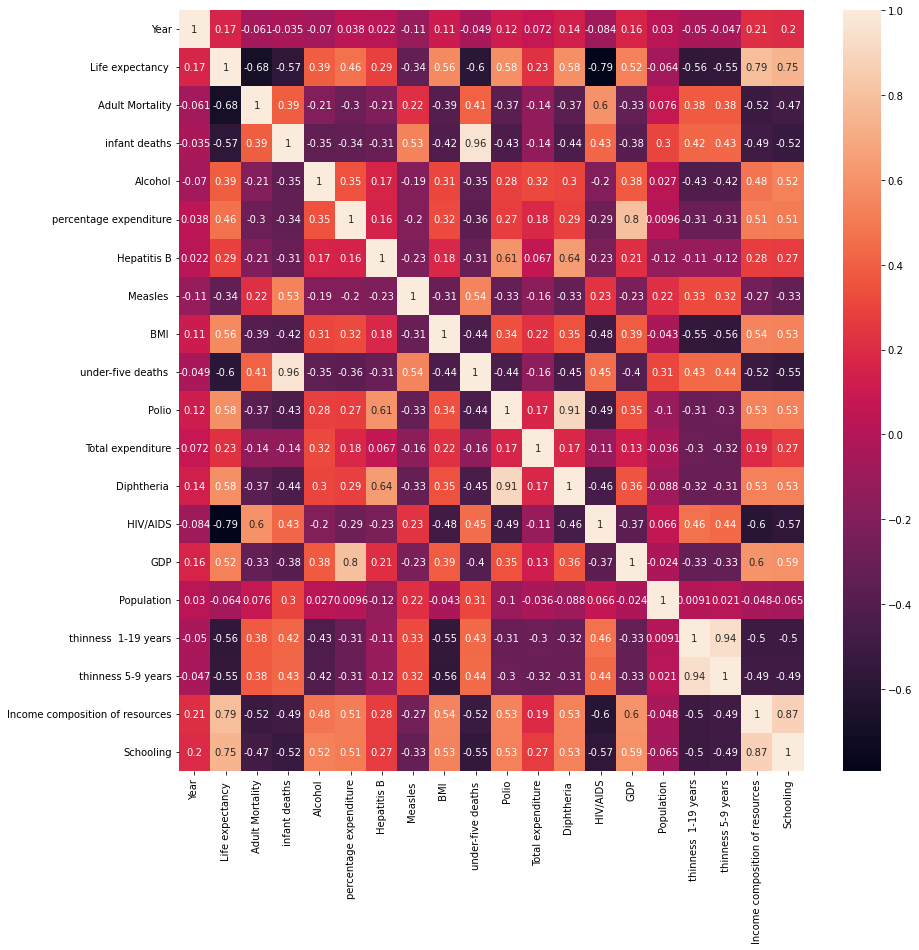

In [21]:
def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr
plt.figure(figsize=(14,14))
sns.heatmap(df.corr(),annot=True)

In [22]:
cor_var = correlation(df,0.8)
cor_var

{' thinness 5-9 years', 'Diphtheria ', 'Schooling', 'under-five deaths '}

In [23]:
####Linear Regression test without Scalling dependent Variable

In [24]:
df2 = df.drop(['Year','Country','Status',' thinness 5-9 years', 'Diphtheria ', 'GDP', 'under-five deaths ', ' HIV/AIDS'], axis=1)
#define varibales
x = df2.drop('Life expectancy ',axis=1).to_numpy()
y = df2['Life expectancy '].to_numpy()
# Create Train Data set and Test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state= 62)

#scale the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train)
x_test2 = sc.transform(x_test)


In [25]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
for name, method in [('Linear Regression', LinearRegression())]:
    method.fit(x_train2,y_train)
    predict = method.predict(x_test2)
print('Method: {}'.format(name))
#coeffcients
print('\nIntercept: {:0.2f}'.format(float(method.intercept_)))
coeff_table=pd.DataFrame(np.transpose(method.coef_),df2.drop('Life expectancy ',axis=1).columns,columns=['Coefficients'])

print('\n')
print(coeff_table)

#MAE, MSE, RMSE
print('\nR2: {:0.2f}'.format(metrics.r2_score(y_test, predict)))
adjusted_r_squared2 = 1-(1-metrics.r2_score(y_test,predict))*(len(y)-1)/(len(y)-x.shape[1]-1)
print('Adj_R2: {:0.2f}'.format(adjusted_r_squared2))

print('\nMean Absolute Error: {:0.2f}'.format(metrics.mean_absolute_error(y_test, predict)))  
print('Mean Squared Error: {:0.2f}'.format(metrics.mean_squared_error(y_test, predict)))  
print('Root Mean Squared Error: {:0.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, predict)))) 


Method: Linear Regression

Intercept: 69.22


                                 Coefficients
Adult Mortality                     -2.982011
infant deaths                       -1.218384
Alcohol                             -0.339059
percentage expenditure               0.251301
Hepatitis B                         -0.349232
Measles                              0.032228
 BMI                                 0.480417
Polio                                1.485766
Total expenditure                    0.279449
Population                           0.365765
 thinness  1-19 years               -0.805981
Income composition of resources      3.128301
Schooling                            0.920765

R2: 0.77
Adj_R2: 0.77

Mean Absolute Error: 3.21
Mean Squared Error: 19.47
Root Mean Squared Error: 4.41


In [26]:
#After scalling the dependent variable
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler

df3 = df2
x2 = df3.drop('Life expectancy ',axis=1).to_numpy()
y2 = df3['Life expectancy '].to_numpy()
#split data
x_train3, x_test3, y_train3, y_test3 = train_test_split(x2,y2,test_size = 0.2, random_state=62)
# min max scaling on independent features
ms = MinMaxScaler()
x_train4 =ms.fit_transform(x_train3)
x_test4 = ms.transform(x_test3)
# scalling on Dependent variable
yj = PowerTransformer(method='yeo-johnson')
y_train4 = yj.fit_transform(y_train3.reshape(-1,1)).flatten()
y_test4 =yj.transform(y_test3.reshape(-1,1)).flatten()


In [27]:
# create a model## delte
for name, method in [('Linear Regression', LinearRegression())]:
    method.fit(x_train4,y_train4)
    pred = method.predict(x_test4)

print('\nTransformed Model - Yeo-Johnson')
print('Method: {}'.format(name))
#coeffcients
print('\nIntercept: {:0.2f}'.format(float(method.intercept_)))
coeff_table=pd.DataFrame(np.transpose(method.coef_),df3.drop('Life expectancy ',axis=1).columns,columns=['Coefficients'])

print('\n')
print(coeff_table)

#MAE, MSE, RMSE
print('\nR2: {:0.2f}'.format(metrics.r2_score(y_test4, pred)))
adjusted_r_squared2 = 1-(1-metrics.r2_score(y_test4,pred))*(len(y2)-1)/(len(y2)-x2.shape[1]-1)
print('Adj_R2: {:0.2f}'.format(adjusted_r_squared2))

print('\nMean Absolute Error: {:0.2f}'.format(metrics.mean_absolute_error(y_test4, pred)))  
print('Mean Squared Error: {:0.2f}'.format(metrics.mean_squared_error(y_test4, pred)))  
print('Root Mean Squared Error: {:0.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test4, pred)))) 



Transformed Model - Yeo-Johnson
Method: Linear Regression

Intercept: -1.00


                                 Coefficients
Adult Mortality                     -1.224558
infant deaths                       -0.429107
Alcohol                             -0.027328
percentage expenditure               0.182103
Hepatitis B                         -0.091894
Measles                              0.058029
 BMI                                 0.154023
Polio                                0.533834
Total expenditure                    0.239993
Population                           0.123169
 thinness  1-19 years               -0.419315
Income composition of resources      1.359885
Schooling                            0.573539

R2: 0.77
Adj_R2: 0.77

Mean Absolute Error: 0.36
Mean Squared Error: 0.22
Root Mean Squared Error: 0.47


In [28]:
model = method.fit(x_train4,y_train4)
model.score(x_test4,y_test4)

0.7692857622074627

In [29]:
#feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

def select_featuresCFS(x_train, y_train, x_test):
    # configure to select all features
    fs = SelectKBest(score_func=f_regression, k='all')
    # learn relationship from training data
    fs.fit(x_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(x_train)
    # transform test input data
    X_test_fs = fs.transform(x_test)
    return X_train_fs, X_test_fs, fs

X_train_fs, X_test_fs, fs = select_featuresCFS(x_train4, y_train4, x_test4)
fs_table=pd.DataFrame(np.transpose(fs.scores_),df3.drop('Life expectancy ',axis=1).columns,
                          columns=['Feature Importance'])
print('Correlaton Feature Selection')
print(fs_table.sort_values(by=['Feature Importance'], ascending=False))


Correlaton Feature Selection
                                 Feature Importance
Income composition of resources         4375.928589
Schooling                               3344.718089
Adult Mortality                         2114.065880
Polio                                   1112.606423
infant deaths                           1105.936411
 thinness  1-19 years                   1086.622205
 BMI                                    1075.603446
percentage expenditure                   744.800494
Alcohol                                  568.664026
Measles                                  259.537869
Hepatitis B                              237.837024
Total expenditure                        182.042260
Population                                12.582461


In [30]:
#Feature Selection
#Eliminating least 4 important
df4 = df3.drop(['Population', 'Total expenditure', 'Hepatitis B', 'Measles '], axis=1)
x3 = df4.drop('Life expectancy ', axis =1).to_numpy()
y3 = df4['Life expectancy '].to_numpy()
#split data
x_train5, x_test5, y_train5, y_test5 = train_test_split(x3,y3,test_size = 0.2, random_state=62)
# min max scaling on independent features
ms = MinMaxScaler()
x_train6 =ms.fit_transform(x_train5)
x_test6 = ms.transform(x_test5)
# scalling on Dependent variable
yj = PowerTransformer(method='yeo-johnson')
y_train6 = yj.fit_transform(y_train5.reshape(-1,1)).flatten()
y_test6 =yj.transform(y_test5.reshape(-1,1)).flatten()

for name, method in [('Linear Regression', LinearRegression())]:
    method.fit(x_train6,y_train6)
    pred = method.predict(x_test6)

print('\nTransformed Model - Yeo-Johnson')
print('Method: {}'.format(name))
#coeffcients
print('\nIntercept: {:0.2f}'.format(float(method.intercept_)))
coeff_table=pd.DataFrame(np.transpose(method.coef_),df4.drop('Life expectancy ',axis=1).columns,columns=['Coefficients'])

print('\n')
print(coeff_table)

#MAE, MSE, RMSE
print('\nR2: {:0.2f}'.format(metrics.r2_score(y_test6, pred)))
adjusted_r_squared2 = 1-(1-metrics.r2_score(y_test6,pred))*(len(y3)-1)/(len(y3)-x2.shape[1]-1)
print('Adj_R2: {:0.2f}'.format(adjusted_r_squared2))

print('\nMean Absolute Error: {:0.2f}'.format(metrics.mean_absolute_error(y_test6, pred)))  
print('Mean Squared Error: {:0.2f}'.format(metrics.mean_squared_error(y_test6, pred)))  
print('Root Mean Squared Error: {:0.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test6, pred)))) 

 


Transformed Model - Yeo-Johnson
Method: Linear Regression

Intercept: -0.90


                                 Coefficients
Adult Mortality                     -1.227973
infant deaths                       -0.314371
Alcohol                              0.023509
percentage expenditure               0.200403
 BMI                                 0.162974
Polio                                0.471015
 thinness  1-19 years               -0.472373
Income composition of resources      1.333999
Schooling                            0.627037

R2: 0.76
Adj_R2: 0.76

Mean Absolute Error: 0.36
Mean Squared Error: 0.23
Root Mean Squared Error: 0.48


In [31]:
#tune hyperparameters
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression
param = {'fit_intercept': [True, False],
    'normalize': [True, False]}
grid_search = GridSearchCV(model, param, cv = 10, scoring = 'neg_mean_squared_error')
grid_search.fit(x_train6,y_train6)

#best hyperparameters
print("best hyperparameters: ", grid_search.best_params_)
print("Best MSE: ", -grid_search.best_score_)


best hyperparameters:  {'fit_intercept': True, 'normalize': True}
Best MSE:  0.2116714343543892


C:\Users\meckw\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\meckw\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model =

In [32]:
#decision Tree
from sklearn.tree import DecisionTreeRegressor
for name,method in [('Decision Tree', DecisionTreeRegressor(random_state=62))]: 
    method.fit(x_train5,y_train5)
    pred = method.predict(x_test5)
print('Method: {}'.format(name))
#MAE, MSE, RMSE
print('\nR2: {:0.2f}'.format(metrics.r2_score(y_test5, pred)))
adjusted_r_squared2 = 1-(1-metrics.r2_score(y_test5,pred))*(len(y3)-1)/(len(y3)-x2.shape[1]-1)
print('Adj_R2: {:0.2f}'.format(adjusted_r_squared2))

print('\nMean Absolute Error: {:0.2f}'.format(metrics.mean_absolute_error(y_test5, pred)))  
print('Mean Squared Error: {:0.2f}'.format(metrics.mean_squared_error(y_test5, pred)))  
print('Root Mean Squared Error: {:0.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test5, pred)))) 

Method: Decision Tree

R2: 0.92
Adj_R2: 0.92

Mean Absolute Error: 1.46
Mean Squared Error: 6.61
Root Mean Squared Error: 2.57


In [33]:
# tune decisionn Tree #gid search
param1 = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10,12],
    'min_samples_leaf': [1, 3, 5]
}
dt_regressor = DecisionTreeRegressor()
grid_search = GridSearchCV(dt_regressor, param1, cv=12)
grid_search.fit(x_train5, y_train5)

# Print the best hyperparameters and best score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)


Best Hyperparameters:  {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best Score:  0.919735985144763
